In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X=df.drop('Wine',axis=1)
y=df['Wine']

## Singular Value Decomposition (SVD)
SVD is a matrix transformation method in which we write a matrix A(mxn)= U S Vt. In USVt U is called as right-singular matrix of size mXm and S is a diagonal matrix called as singular matrix of size mXn and Vt is a left singular matrix of size nXn. 

In [4]:
from sklearn.decomposition import TruncatedSVD
ts=TruncatedSVD(n_components=2)
res=ts.fit_transform(X)
res

array([[ 1.07275836e+03, -9.67324841e-01],
       [ 1.05462161e+03,  2.43108121e+01],
       [ 1.18895307e+03,  3.75913121e+01],
       [ 1.48324411e+03,  6.12935580e+01],
       [ 7.44147210e+02, -3.25753080e+01],
       [ 1.45329348e+03,  5.91413091e+01],
       [ 1.29255679e+03,  5.56541867e+01],
       [ 1.30046887e+03,  3.16564434e+01],
       [ 1.04939991e+03,  2.57395543e+01],
       [ 1.04955825e+03,  2.43575636e+01],
       [ 1.51211318e+03,  7.23554692e+01],
       [ 1.28254819e+03,  5.50007323e+01],
       [ 1.32155586e+03,  6.56751794e+01],
       [ 1.15291192e+03,  4.45113018e+01],
       [ 1.54839264e+03,  8.08913532e+01],
       [ 1.31432065e+03,  4.21303033e+01],
       [ 1.28552183e+03,  3.02261696e+01],
       [ 1.13600125e+03,  1.72727461e+01],
       [ 1.68124228e+03,  8.98946239e+01],
       [ 8.53025373e+02, -1.63727677e+01],
       [ 7.89667103e+02, -3.38826047e+01],
       [ 7.76997903e+02, -1.25547286e+01],
       [ 1.03996670e+03,  2.02779160e+01],
       [ 1.

##### The intuition for PCA is that X is always centred around origin meaning that mean of all columns is 0

## PCA using Numpy Library

In [5]:
X_centred=X-X.mean(axis=0)
u,d,vt=np.linalg.svd(X_centred)
print(d)
w2=vt.T[:,:2]
X2D=X_centred.dot(w2)
X2D

[4.19031225e+03 1.74753375e+02 4.08723149e+01 2.97226953e+01
 1.47480712e+01 1.22011600e+01 7.02697044e+00 5.17633888e+00
 4.45433804e+00 3.56249362e+00 2.57894324e+00 1.93127129e+00
 1.20501264e+00]


,0,1
0,-318.562979,-21.492131
1,-303.097420,5.364718
2,-438.061133,6.537309
3,-733.240139,-0.192729
4,11.571428,-18.489995
5,-703.231192,0.332159
6,-542.971581,13.518967
7,-548.401860,-11.449432
8,-298.036863,8.180158
9,-298.049553,7.101543


## PCA using SKlearn library
sklearn provides PCA method in which we can choose n_components meaning how many pc's to be reduced. We can see the variance explained using the ratio explained_variance_ratio_ attribute. We can see that the features retained is same as the result obtained from numpy library without using any library are same

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
h=pca.fit_transform(X)
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05])

In [7]:
h

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00,
        -2.50113758e-01],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00,
        -8.64034749e-01],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00,
         9.12410681e-01],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01,
        -5.41250645e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01,
         1.36089609e+00],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01,
        -3.59993827e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00,
         5.55661430e-02],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02,
         1.34945380e+00],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00,
        -9.10643037e-01],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00,
        -1.67704202e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00,
         1.59831835e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01,
      

### We implement cumsum to identify features if any of them explain 95% of the variance
Besides we can also visualize the elbow method to choose the best number for n_components

In [8]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d=np.argmax(cumsum>=0.95)+1
d

[0.99809123 0.99982715 0.99992211 0.99997232]


1

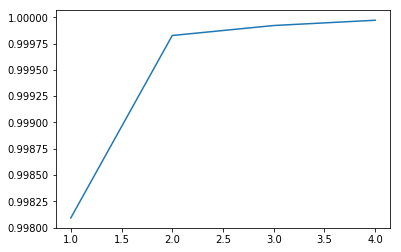

In [9]:
plt.plot(range(1,5),cumsum,zorder=2)

###### To retrieve 95% of variance we can give the value of n_components as 0.95 and we will get all the features which explain 0.95 variance

In [10]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X)
X_reduced

array([[ 318.56297929],
       [ 303.09741966],
       [ 438.06113292],
       [ 733.24013935],
       [ -11.5714285 ],
       [ 703.23119174],
       [ 542.97158087],
       [ 548.40185984],
       [ 298.0368628 ],
       [ 298.04955314],
       [ 763.07971194],
       [ 532.94322773],
       [ 572.83441039],
       [ 402.92535829],
       [ 800.05339386],
       [ 563.245578  ],
       [ 533.37965064],
       [ 383.31759108],
       [ 933.1183875 ],
       [  98.40317748],
       [  33.593594  ],
       [  23.14643754],
       [ 288.09303022],
       [ 267.98151253],
       [  98.01988577],
       [  83.49874396],
       [ 447.92559622],
       [ 537.91916502],
       [ 168.2104676 ],
       [ 288.00824708],
       [ 538.0264521 ],
       [ 768.09293886],
       [ 243.1507509 ],
       [ 488.60128005],
       [ 348.231007  ],
       [ 173.07995743],
       [ 133.28642355],
       [ 358.01855918],
       [ 273.04443152],
       [  13.64300211],
       [  48.42964225],
       [ 287.884

## Inverse Transformation for Compression
We can partially retrieve back to the original dataset after applying PCA using inverse_transform(). However some of the data is lost and is called reconstruction error. This mean squared error between original data and reconstructed error is called reconstruction error

In [11]:
X_recovred=pca.inverse_transform(X_reduced)
X_recovred

array([[1.35291983e+01, 2.11940197e+00, 2.42860661e+00, ...,
        1.01204477e+00, 2.83625052e+00, 1.06539983e+03],
       [1.35035368e+01, 2.12993426e+00, 2.42559228e+00, ...,
        1.00939429e+00, 2.82534836e+00, 1.04993701e+03],
       [1.37274774e+01, 2.03802187e+00, 2.45189748e+00, ...,
        1.03252437e+00, 2.92048855e+00, 1.18487683e+03],
       ...,
       [1.31473933e+01, 2.27610699e+00, 2.38375784e+00, ...,
        9.72609386e-01, 2.67404229e+00, 8.35335669e+02],
       [1.31556866e+01, 2.27270316e+00, 2.38473201e+00, ...,
        9.73465972e-01, 2.67756566e+00, 8.40332953e+02],
       [1.26904297e+01, 2.46365954e+00, 2.33008055e+00, ...,
        9.25411107e-01, 2.47990322e+00, 5.59983169e+02]])

## IncrementalPCA for Datsets that does not fit into memory
Using this method we will split the input into several batches and then train IncrementalPCA and transform on the total dataset. This will be helpful for large datasets

In [12]:
from sklearn.decomposition import IncrementalPCA
ipca=IncrementalPCA(n_components=5)
for X_batch in np.array_split(X,25):
    ipca.partial_fit(X)
X_reduced=ipca.transform(X)
X_reduced

array([[ 3.18562979e+02,  2.14921307e+01, -3.13073470e+00,
         2.50113758e-01, -6.77078222e-01],
       [ 3.03097420e+02, -5.36471768e+00, -6.82283550e+00,
         8.64034749e-01,  4.86095978e-01],
       [ 4.38061133e+02, -6.53730945e+00,  1.11322298e+00,
        -9.12410681e-01, -3.80651426e-01],
       [ 7.33240139e+02,  1.92729032e-01,  9.17257016e-01,
         5.41250645e-01, -8.58662289e-01],
       [-1.15714285e+01,  1.84899946e+01,  5.54422076e-01,
        -1.36089609e+00, -2.76441556e-01],
       [ 7.03231192e+02, -3.32158674e-01, -9.49375334e-01,
         3.59993827e-01, -1.56827100e-01],
       [ 5.42971581e+02, -1.35189666e+01, -2.12694283e+00,
        -5.55661430e-02,  4.83659661e-01],
       [ 5.48401860e+02,  1.14494324e+01, -4.04924202e-02,
        -1.34945380e+00,  8.52590856e-01],
       [ 2.98036863e+02, -8.18015784e+00, -3.88097517e+00,
         9.10643037e-01, -3.11488981e-01],
       [ 2.98049553e+02, -7.10154294e+00, -1.55845533e+00,
         1.67704202e+00

## Randomized PCA
This method is a stochastic algorithm that quickly finds an approximation of the first d principal components. The computational complexity is very less when compared to traditional PCA and makes this method to work fast

In [13]:
rnd_pca=PCA(n_components=4,svd_solver="randomized")
X_reduced=rnd_pca.fit_transform(X)
X_reduced

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00,
        -2.50113758e-01],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00,
        -8.64034749e-01],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00,
         9.12410681e-01],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01,
        -5.41250645e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01,
         1.36089609e+00],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01,
        -3.59993827e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00,
         5.55661430e-02],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02,
         1.34945380e+00],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00,
        -9.10643037e-01],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00,
        -1.67704202e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00,
         1.59831835e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01,
      

## Kernal PCA
This PCA variant is used for non-linear data just as an kernal technique we use with SVM.

In [14]:
from sklearn.decomposition import KernelPCA
rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
X_reduced=rbf_pca.fit_transform(X)
X_reduced

array([[-7.94781900e-03, -8.04922982e-06],
       [-1.70513829e-02, -2.24143430e-05],
       [-7.86224565e-03, -7.95420698e-06],
       [-7.83407550e-03, -7.92297636e-06],
       [-7.83410661e-03, -7.92301133e-06],
       [-7.83407550e-03, -7.92297636e-06],
       [-1.16837248e-02, -1.25522399e-05],
       [-7.83494232e-03, -7.92393806e-06],
       [-3.52705535e-02, -5.05996837e-05],
       [-3.44792142e-02, -4.95046587e-05],
       [-1.17343381e-02, -1.24630395e-05],
       [-1.37048922e-02, -1.49749103e-05],
       [-7.83407550e-03, -7.92297636e-06],
       [-3.26417023e-02, -4.74266795e-05],
       [-7.83407550e-03, -7.92297636e-06],
       [-7.83410713e-03, -7.92301143e-06],
       [-7.84094502e-03, -7.93062795e-06],
       [-7.97527099e-03, -8.07975108e-06],
       [-7.83407550e-03, -7.92297636e-06],
       [-8.19607899e-03, -8.34471350e-06],
       [-7.83411550e-03, -7.92302070e-06],
       [-7.83418410e-03, -7.92309687e-06],
       [-1.40900519e-02, -1.58797378e-05],
       [-9.

## Inverse Transform for KernelPCA
This kernelpca requires inversetransform to be enabled and then implement the method

In [15]:
rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.04,fit_inverse_transform=True)
X_reduced=rbf_pca.fit_transform(X)
X_reconstructed=rbf_pca.inverse_transform(X_reduced)
X_reconstructed

array([[ 12.93947876,   2.32223906,   2.35533347, ...,   0.95319183,
          2.59803984, 743.9953947 ],
       [ 12.94009243,   2.32003696,   2.35538273, ...,   0.95340996,
          2.59661821, 744.51074986],
       [ 12.93947258,   2.32225968,   2.35533294, ...,   0.95318975,
          2.59805312, 743.99052644],
       ...,
       [ 12.9397664 ,   2.32124736,   2.35535762, ...,   0.95329101,
          2.59740031, 744.22856418],
       [ 12.93977449,   2.32121853,   2.35535827, ...,   0.95329387,
          2.5973817 , 744.23531545],
       [ 12.93990208,   2.32075615,   2.35536837, ...,   0.95333955,
          2.597083  , 744.34341364]])